In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import transforms
import torch

from PIL import Image

from ddpm_augmented.fid.fid_score import calculate_fid

In [2]:
images = torch.tensor(np.load('./ddpm_augmented/images.npy'))

images.shape

torch.Size([5056, 3, 32, 32])

In [3]:
def show_images(x):
  x = x * 0.5 + 0.5
  grid = torchvision.utils.make_grid(x)
  grid = grid.permute(1, 2, 0).clip(0, 1) * 255
  grid = Image.fromarray(np.array(grid).astype(np.uint8))
  return grid

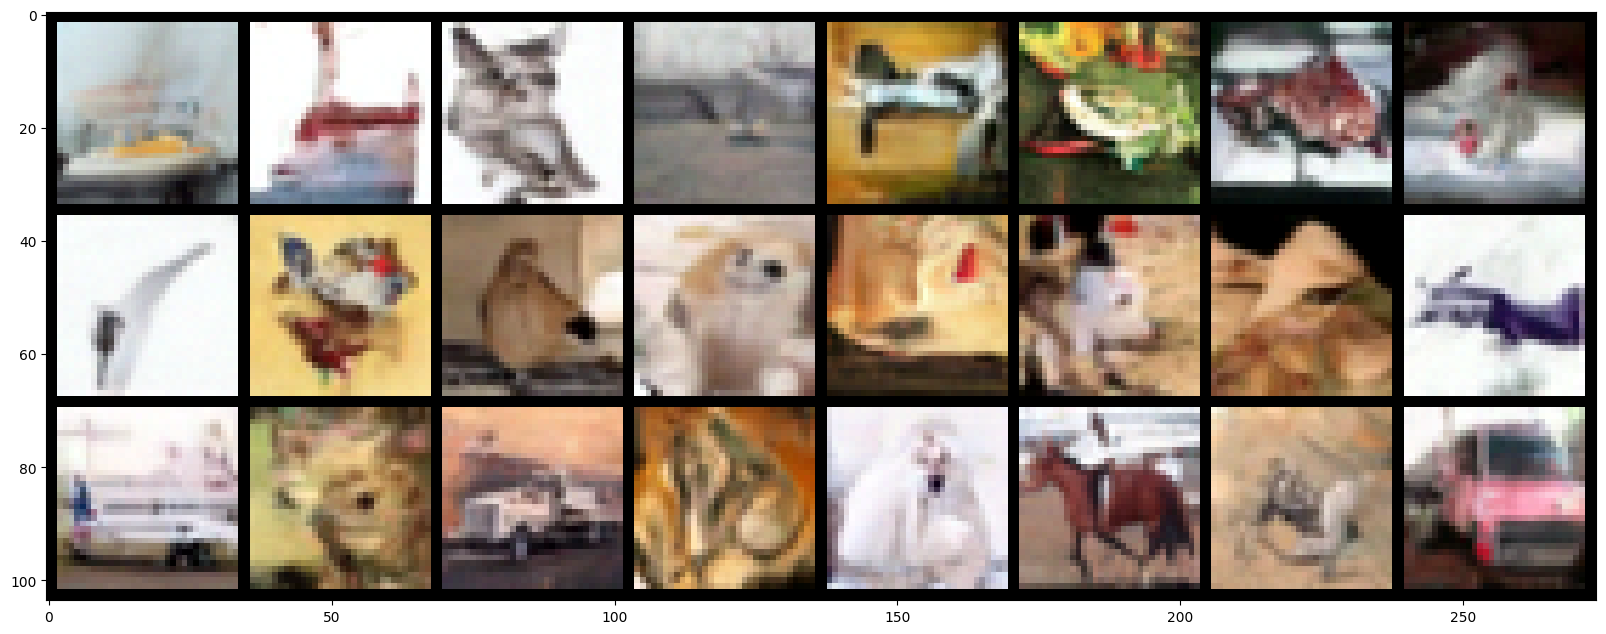

In [4]:
plt.figure(figsize=[20, 20])
plt.imshow(show_images(images[:24]))

## FID

In [5]:
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

In [6]:
cifar_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False)

cifar_images = torch.stack([preprocess(i) for i in cifar_dataset.data])

In [7]:
cifar_images.shape

torch.Size([50000, 3, 32, 32])

In [8]:
dataset = torch.utils.data.TensorDataset(cifar_images)
dataloader = torch.utils.data.DataLoader(
        dataset,
        batch_size=8,
        shuffle=False,
        drop_last=False,
    )

In [9]:
calculate_fid(cifar_images, images, 16, 'cpu', 2048)

  1%|          | 19/3125 [00:06<18:52,  2.74it/s]


KeyboardInterrupt: 